In [1]:
# Show the dataframe shape.
import pandas as pd
df = pd.read_csv('marketing_customer_analysis.csv')
print(df.shape)
df.info()

(10910, 26)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     10910 non-null  int64  
 1   Customer                       10910 non-null  object 
 2   State                          10279 non-null  object 
 3   Customer Lifetime Value        10910 non-null  float64
 4   Response                       10279 non-null  object 
 5   Coverage                       10910 non-null  object 
 6   Education                      10910 non-null  object 
 7   Effective To Date              10910 non-null  object 
 8   EmploymentStatus               10910 non-null  object 
 9   Gender                         10910 non-null  object 
 10  Income                         10910 non-null  int64  
 11  Location Code                  10910 non-null  object 
 12  Marital Status                 109

In [2]:
# Standardize header names.
df.columns = list(map(lambda x: x.lower(), df.columns))
print(df.columns)

Index(['unnamed: 0', 'customer', 'state', 'customer lifetime value',
       'response', 'coverage', 'education', 'effective to date',
       'employmentstatus', 'gender', 'income', 'location code',
       'marital status', 'monthly premium auto', 'months since last claim',
       'months since policy inception', 'number of open complaints',
       'number of policies', 'policy type', 'policy', 'renew offer type',
       'sales channel', 'total claim amount', 'vehicle class', 'vehicle size',
       'vehicle type'],
      dtype='object')


In [3]:
# Which columns are numerical?
import numpy as np
df.select_dtypes([np.number])

,unnamed: 0,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount
0,0,4809.216960,48029,61,7.0,52,0.0,9,292.800000
1,1,2228.525238,0,64,3.0,26,0.0,1,744.924331
2,2,14947.917300,22139,100,34.0,31,0.0,2,480.000000
3,3,22332.439460,49078,97,10.0,3,0.0,2,484.013411
4,4,9025.067525,23675,117,NaN,31,NaN,7,707.925645
...,...,...,...,...,...,...,...,...,...
10905,10905,15563.369440,0,253,NaN,40,NaN,7,1214.400000
10906,10906,5259.444853,61146,65,7.0,68,0.0,6,273.018929
10907,10907,23893.304100,39837,201,11.0,63,0.0,2,381.306996
10908,10908,11971.977650,64195,158,0.0,27,4.0,6,618.288849


In [4]:
# Which columns are categorical?
df.select_dtypes(['object'])

,customer,state,response,coverage,education,effective to date,employmentstatus,gender,location code,marital status,policy type,policy,renew offer type,sales channel,vehicle class,vehicle size,vehicle type
0,DK49336,Arizona,No,Basic,College,2/18/11,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,NaN
1,KX64629,California,No,Basic,College,1/18/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,No,Basic,Bachelor,2/10/11,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
3,XL78013,Oregon,Yes,Extended,College,1/11/11,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
4,QA50777,Oregon,No,Premium,Bachelor,1/17/11,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,No,Premium,Bachelor,1/19/11,Unemployed,F,Suburban,Married,Personal Auto,Personal L1,Offer3,Web,Luxury Car,Medsize,A
10906,KX53892,Oregon,No,Basic,College,1/6/11,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize,A
10907,TL39050,Arizona,No,Extended,Bachelor,2/6/11,Employed,F,Rural,Married,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,Medsize,NaN
10908,WA60547,California,No,Premium,College,2/13/11,Employed,F,Urban,Divorced,Personal Auto,Personal L1,Offer1,Branch,SUV,Medsize,A


In [5]:
#Check and deal with NaN values.

# first let's check where they are
round((df.isna().sum()/df.shape[0]),4)*100

unnamed: 0                        0.00
customer                          0.00
state                             5.78
customer lifetime value           0.00
response                          5.78
coverage                          0.00
education                         0.00
effective to date                 0.00
employmentstatus                  0.00
gender                            0.00
income                            0.00
location code                     0.00
marital status                    0.00
monthly premium auto              0.00
months since last claim           5.80
months since policy inception     0.00
number of open complaints         5.80
number of policies                0.00
policy type                       0.00
policy                            0.00
renew offer type                  0.00
sales channel                     0.00
total claim amount                0.00
vehicle class                     5.70
vehicle size                      5.70
vehicle type             

In [11]:
# For numerical columns, we have more than 5% of missing values in the columns : 
#'months since last claim '
# 'number of open complaints'

# For categorical, same for the columns :
# state
# response  
# vehicle class
# vehicle size
# vehicle type  : here it's more than 50% ! It would not have any sense to replace the 50% missing values with a mode value
# as we already have info on vehicules with vehicle class and vehicle size. I choose to drop this column completely.

In [6]:
# Drop vehicle type column (and unnamed)
df = df.drop(['vehicle type'], axis=1)
df = df.drop(['unnamed: 0'], axis=1)

In [7]:
df.shape

(10910, 24)

In [8]:
# Then I choose not to drop rows because there are too many missing values in the columns (more than 5%)
# Let's start with numerical columns :
# I'll first check the dispersion to see if I replace NaN by the median ou the mean value

np.std(df['months since last claim'])

#I'll use the median for this column

10.079858341689773

In [9]:
np.std(df['number of open complaints'])

# I'll use the mean for this column

0.9124127872193832

In [10]:
# replace NaN in column months since last claim by the median value
median_months_last_claim = df['months since last claim'].median()
df['months since last claim'] = df['months since last claim'].fillna(median_months_last_claim)
df['months since last claim'].isna().sum()

0

In [11]:
# replace NaN in column number of open complaints by the mean value

mean_number_open_complaints = round(df['number of open complaints'].mean(),2)
df['number of open complaints'] = df['number of open complaints'].fillna(mean_number_open_complaints)
df['number of open complaints'].isna().sum()

0

In [12]:
# For categorical values, I'll first check the distribution of the values. Then I decide what to do.
df['state'].value_counts(dropna=False)

California    3552
Oregon        2909
Arizona       1937
Nevada         993
Washington     888
NaN            631
Name: state, dtype: int64

In [25]:
# if I choose to replace the NaN by the mode (California), it will change the data distribution a lot
# Moreover all states are well represented in the population.
# So I decide to replace NaN randomly with the value "unknown" not to impact my distribution

df['state'] = df['state'].fillna('Unknown')
df['state'].isna().sum()

0

In [26]:
df['response'].value_counts(dropna=False)

No     8813
Yes    1466
NaN     631
Name: response, dtype: int64

In [27]:
df['response'] = df['response'].fillna('No')
df['response'].isna().sum()

0

In [28]:
df['vehicle class'].value_counts(dropna=False)

Four-Door Car    5212
Two-Door Car     2118
SUV              2012
NaN               622
Sports Car        550
Luxury SUV        208
Luxury Car        188
Name: vehicle class, dtype: int64

In [29]:
df['vehicle class'] = df['vehicle class'].fillna('Four-Door Car')
df['vehicle class'].isna().sum()

0

In [30]:
df['vehicle size'].value_counts(dropna=False)

Medsize    7251
Small      1966
Large      1071
NaN         622
Name: vehicle size, dtype: int64

In [31]:
df['vehicle size'] = df['vehicle size'].fillna('Medsize')
df['vehicle size'].isna().sum()

0

In [32]:
# There are no more missing values in the dataframe
df.isna().sum()

customer                         0
state                            0
customer lifetime value          0
response                         0
coverage                         0
education                        0
effective to date                0
employmentstatus                 0
gender                           0
income                           0
location code                    0
marital status                   0
monthly premium auto             0
months since last claim          0
months since policy inception    0
number of open complaints        0
number of policies               0
policy type                      0
policy                           0
renew offer type                 0
sales channel                    0
total claim amount               0
vehicle class                    0
vehicle size                     0
dtype: int64

In [33]:
# Datetime format - Extract the months from the dataset and store in a separate column. 

# First let's convert the value into datetime format in the column effective to date

df['effective to date'] = pd.to_datetime(df['effective to date'], errors='coerce')
df.dtypes

df['effective to date'].unique

<bound method Series.unique of 0       2011-02-18
1       2011-01-18
2       2011-02-10
3       2011-01-11
4       2011-01-17
           ...    
10905   2011-01-19
10906   2011-01-06
10907   2011-02-06
10908   2011-02-13
10909   2011-01-08
Name: effective to date, Length: 10910, dtype: datetime64[ns]>

In [34]:
df['month_effective'] = df['effective to date'].dt.month
print(df['month_effective'])
print(df.columns)

0        2
1        1
2        2
3        1
4        1
        ..
10905    1
10906    1
10907    2
10908    2
10909    1
Name: month_effective, Length: 10910, dtype: int64
Index(['customer', 'state', 'customer lifetime value', 'response', 'coverage',
       'education', 'effective to date', 'employmentstatus', 'gender',
       'income', 'location code', 'marital status', 'monthly premium auto',
       'months since last claim', 'months since policy inception',
       'number of open complaints', 'number of policies', 'policy type',
       'policy', 'renew offer type', 'sales channel', 'total claim amount',
       'vehicle class', 'vehicle size', 'month_effective'],
      dtype='object')


In [38]:
# Then filter the data to show only the information for the first quarter , ie. January, February and March.

df_q1 = df[(df['month_effective'] == 1) | (df['month_effective'] == 2) | (df['month_effective'] == 3)]
display(df_q1.shape)

(10910, 25)

In [95]:
# it seems that all the 'effective to date' data are in the first quarter

# ROUND 3

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer                       10910 non-null  object        
 1   state                          10910 non-null  object        
 2   customer lifetime value        10910 non-null  float64       
 3   response                       10910 non-null  object        
 4   coverage                       10910 non-null  object        
 5   education                      10910 non-null  object        
 6   effective to date              10910 non-null  datetime64[ns]
 7   employmentstatus               10910 non-null  object        
 8   gender                         10910 non-null  object        
 9   income                         10910 non-null  int64         
 10  location code                  10910 non-null  object        
 11  marital status 

In [43]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
customer lifetime value,10910.0,8018.241094,6885.081434,1898.007675,4014.453113,5771.147235,8992.779137,83325.381190
income,10910.0,37536.284785,30359.195670,0.000000,0.000000,33813.500000,62250.750000,99981.000000
monthly premium auto,10910.0,93.196059,34.442532,61.000000,68.000000,83.000000,109.000000,298.000000
months since last claim,10910.0,15.082401,9.787208,0.000000,7.000000,14.000000,23.000000,35.000000
months since policy inception,10910.0,48.091934,27.940675,0.000000,24.000000,48.000000,71.000000,99.000000
number of open complaints,10910.0,0.384009,0.885589,0.000000,0.000000,0.000000,0.380000,5.000000
number of policies,10910.0,2.979193,2.399359,1.000000,1.000000,2.000000,4.000000,9.000000
total claim amount,10910.0,434.888330,292.180556,0.099007,271.082527,382.564630,547.200000,2893.239678
month_effective,10910.0,1.466728,0.498915,1.000000,1.000000,1.000000,2.000000,2.000000


In [45]:
df.describe(include=[np.object]).T

/var/folders/tk/75w8q4_s16n1_zv4jdmdlwhh0000gn/T/ipykernel_7861/407547206.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df.describe(include=[np.object]).T


,count,unique,top,freq
customer,10910,9134,ID89933,7
state,10910,6,California,3552
response,10910,2,No,9444
coverage,10910,3,Basic,6660
education,10910,5,Bachelor,3272
employmentstatus,10910,5,Employed,6789
gender,10910,2,F,5573
location code,10910,3,Suburban,6902
marital status,10910,3,Married,6319
policy type,10910,3,Personal Auto,8128


In [46]:
# Show a plot of the total number of responses.
# first import libraries
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

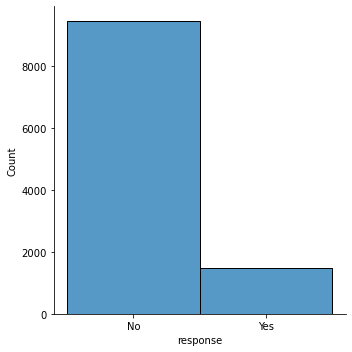

In [48]:
sns.displot(df['response'], bins=20)
plt.show()

In [50]:
# Show a plot of the response rate by the sales channel

df['sales channel'].unique()

array(['Agent', 'Call Center', 'Branch', 'Web'], dtype=object)

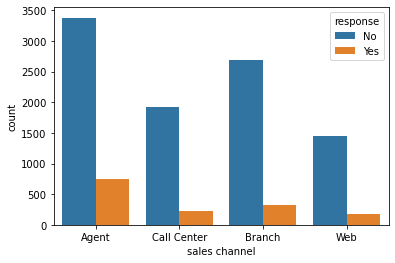

In [52]:
sns.countplot(x="sales channel", hue="response", data=df)
plt.show()
# seems to answer more on the Agent channel
# but in terms of proportion, web is an interesting channel too

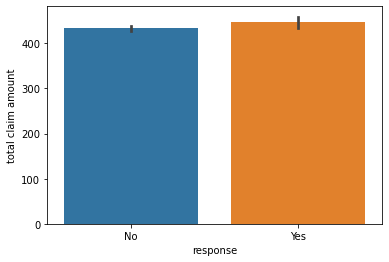

In [55]:
sns.barplot(x = 'response',y='total claim amount', data = df) 
plt.show()
# the total claim amount doesn't seem to have any impact on the response

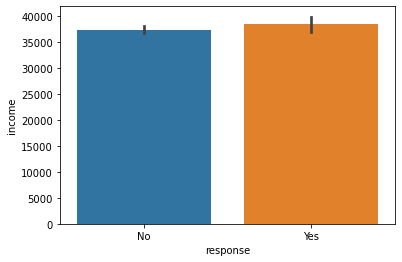

In [56]:
# Show a plot of the response rate by income.
sns.barplot(x = 'response',y='income', data = df) 
plt.show()

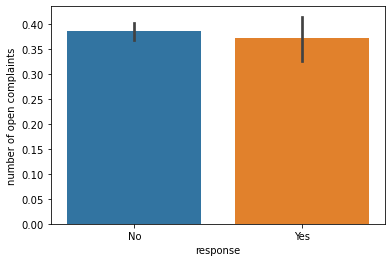

In [59]:
sns.barplot(x = 'response',y='number of open complaints', data = df) 
plt.show()

In [ ]:
# same with income. Number of open complaints seem to have more impact on the response
# End of round 3